In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from csv import reader

In [2]:
def PlotLine(x, y, x_label, y_label):
    plt.plot(x,y, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [5]:
crime = sc.textFile('./data/NYPD_Complaint_Data_Historic.csv', 1)
crime = crime.mapPartitions(lambda x: reader(x))
header = crime.first()


In [6]:
lines = crime.filter(lambda line: line != header).map(lambda x: (x[1], 1)).reduceByKey(lambda x,y: x+y).map(lambda x: "%s\t%s" % (x[0],x[1])) \
               .collect()
lines = [line.split('\t') for line in lines]
pd.DataFrame(lines)

,0,1
0,,655
1,09/01/2012,1829
2,04/02/2002,1
3,03/04/2008,1427
4,04/18/2013,1418
5,05/27/2007,1295
6,07/20/2004,4
7,03/28/2006,1504
8,01/13/2004,4
9,02/22/1914,1


### Count By Year 

In [126]:
count_by_year= pd.read_csv("countbyyear_merged.out",'\t')
count_by_year=count_by_year[:-1] # Removal of the header line
count_by_year.columns = ['year', 'crime_count']

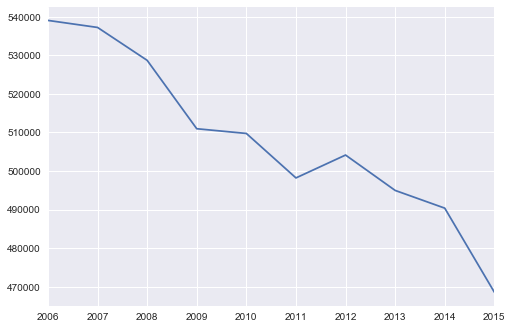

In [36]:
plt.plot(count_by_year['year'][-10:], count_by_year['crime_count'][-10:])
plt.xlim(2006,2015)
plt.show()

### Count By Crime Type 
#### Pie plot

In [55]:
count_by_crime_type= pd.read_csv("count_by_crime_type_merged.out",'\t')
count_by_crime_type.columns=['Crime_type','Count']

#### Pie Plot the Top 10 Crimes

In [122]:
top10=count_by_crime_type.sort_values(by=['Count'], ascending =False)[:9]
other=pd.DataFrame(count_by_crime_type.sort_values(by=['Count'], ascending =False)[9:].sum())
other.ix['Crime_type']="Other"
top10=top10.append(other.transpose())
top10

,Crime_type,Count
70,PETIT LARCENY,822498
54,HARRASSMENT 2,604070
1,ASSAULT 3 & RELATED OFFENSES,521538
47,CRIMINAL MISCHIEF & RELATED OF,505774
57,GRAND LARCENY,429196
18,DANGEROUS DRUGS,348469
33,OFF. AGNST PUB ORD SENSBLTY &,283065
41,ROBBERY,198772
8,BURGLARY,191406
0,Other,1177604


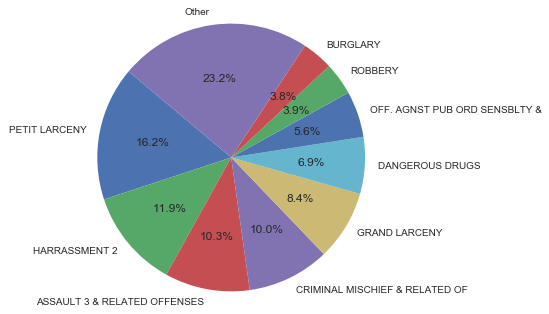

In [120]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = top10['Crime_type']
sizes = top10['Count']

 
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=140)
 
plt.axis('equal')
plt.title 
plt.save("Top10Crime.png")
plt.show()

### Count by Crime Type

In [143]:
lines = crime.filter(lambda line: line != header) \
            .filter(lambda x:'2006'<=x[1][6:]<='2016')\
            .map(lambda x: (x[11],1)) \
            .reduceByKey(lambda x,y: (x+y))

lines = lines.map(lambda x: "%s\t%d" %(x[0],x[1])).collect()
lines = [line.split('\t') for line in lines]

In [146]:

df=pd.DataFrame(lines)
df.columns=['type','Count']
df

,type,Count
0,FELONY,1556546
1,VIOLATION,613918
2,MISDEMEANOR,2911330


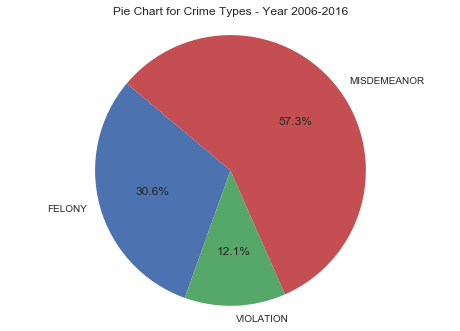

In [148]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = df['type']
sizes = df['Count']

 
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=140)
 
plt.axis('equal')
plt.title ('Pie Chart for Crime Types - Year 2006-2016')
plt.show()

### Count By Year Month Groupby Crime Type

In [7]:
lines = crime.filter(lambda line: line != header) \
                   .map(lambda x: (x[1][6:]+"/"+x[1][:2],(1,0,0,0)) if x[11]=='FELONY' else (x[1][6:]+"/"+x[1][:2],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1][6:]+"/"+x[1][:2],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1][6:]+"/"+x[1][:2],(0,0,0,1)) ) \
           .reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])).filter(lambda x:'2006'<=x[0][:4]<='2016')

lines = lines.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
lines = [line.split('\t') for line in lines]


In [8]:
import datetime
from datetime import datetime
df=pd.DataFrame(lines)

df.columns=['DATE','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
df['DATE']=pd.to_datetime(df['DATE'])
df=df.sort_values(by='DATE',ascending=True)
df

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER
102,2006-01-01,14971,24450,5875,0
75,2006-02-01,11959,21283,4988,0
91,2006-03-01,14202,25096,5919,0
89,2006-04-01,13418,24492,5636,0
114,2006-05-01,14946,25564,6314,0
47,2006-06-01,14601,25415,6198,0
49,2006-07-01,15255,25771,6252,0
13,2006-08-01,15652,25748,5895,0
44,2006-09-01,15128,24515,6020,0
93,2006-10-01,15623,25297,5950,0


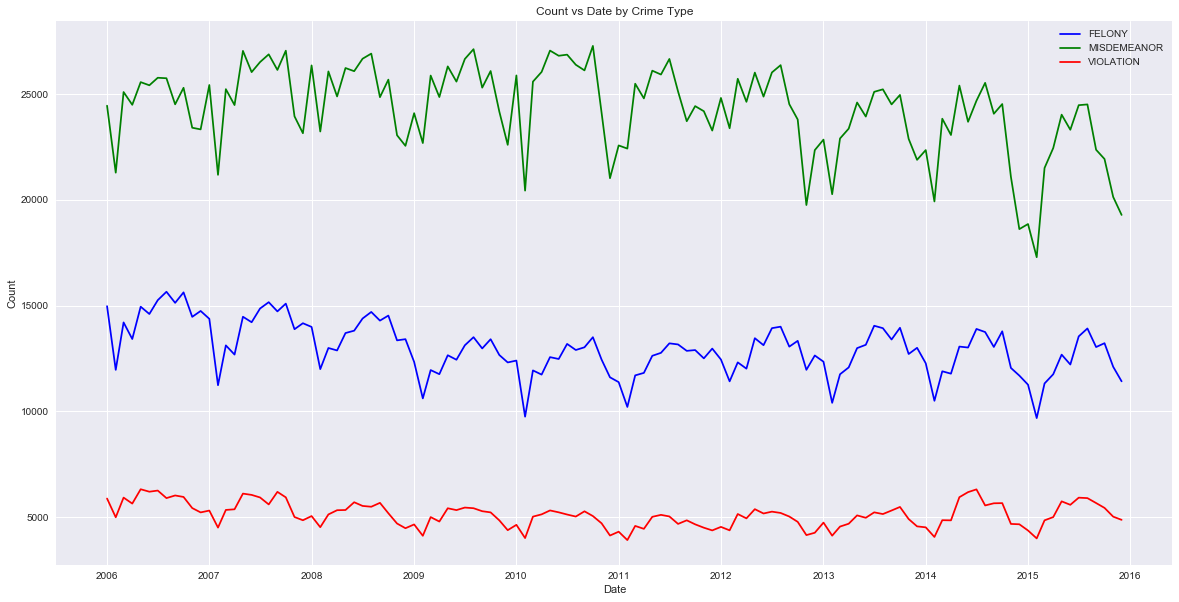

In [66]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.plot_date(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.plot_date(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

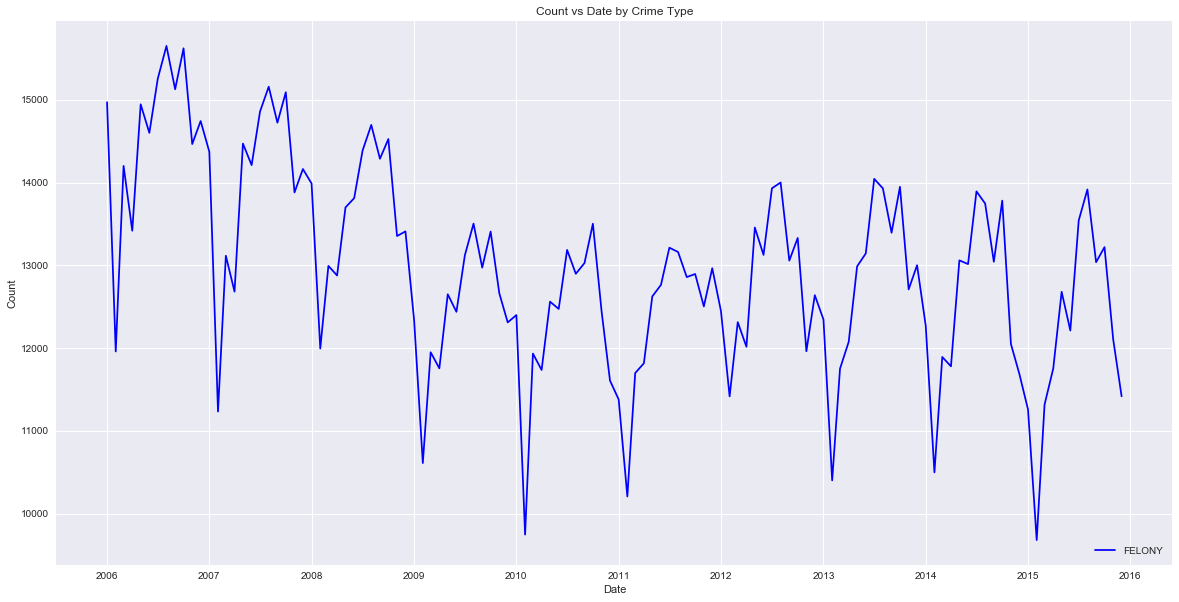

In [65]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

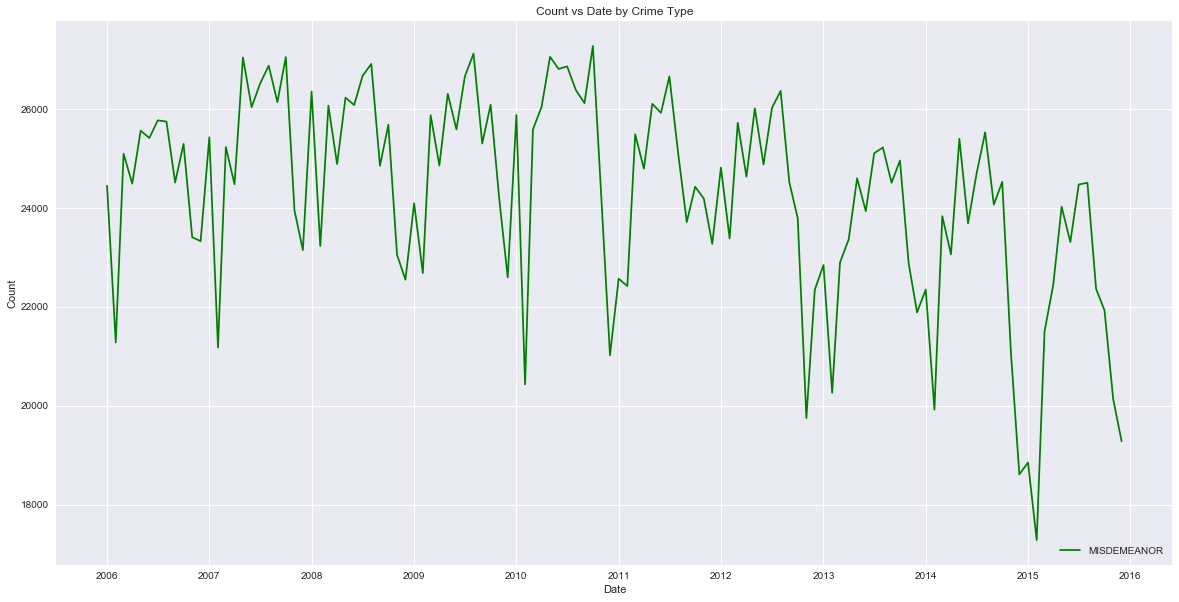

In [67]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

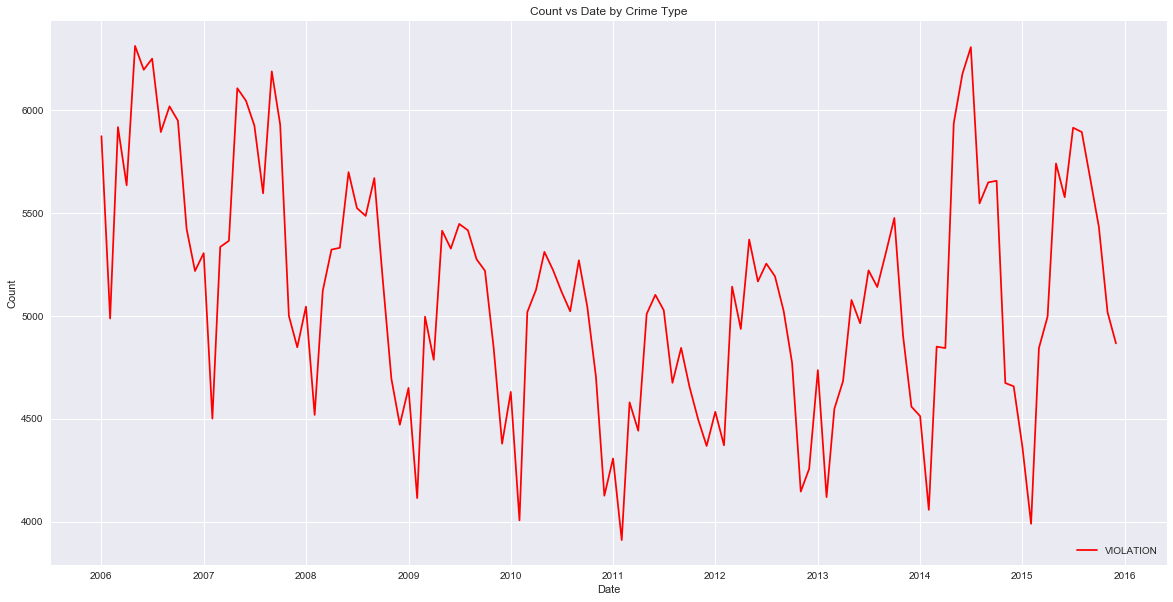

In [68]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

### Count by Month 

In [241]:
lines = crime.filter(lambda line: line != header) \
            .filter(lambda x:'2006'<=x[1][6:]<='2016')\
            .map(lambda x: (x[1][:2],(1,0,0,0)) if x[11]=='FELONY' else (x[1][:2],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1][:2],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1][:2],(0,0,0,1)) ) \
            .reduceByKey(lambda x,y: ((x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])))

lines = lines.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
lines = [line.split('\t') for line in lines]


In [254]:
import datetime
from datetime import datetime
df=pd.DataFrame(lines)

df.columns=['DATE','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
#df['DATE']=pd.to_datetime(df['MONTH'])
df=df.sort_values(by='DATE',ascending=True)
df

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER
1,01,127767,237652,47963,0
11,02,107740,212087,42574,0
8,03,123163,247313,50361,0
9,04,121905,243069,50144,0
0,05,133136,258350,55621,0
6,06,131796,251675,55488,0
7,07,139434,259425,55999,0
5,08,140666,259799,53871,0
3,09,135529,246116,54918,0
10,10,139329,251040,53321,0


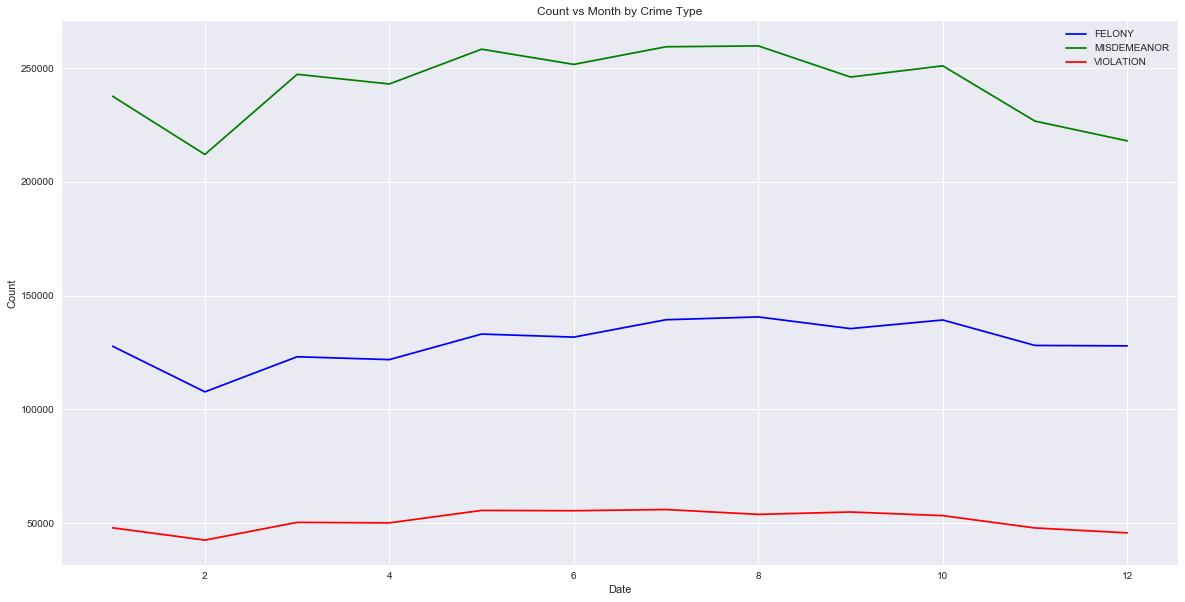

In [95]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.plot(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.plot(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

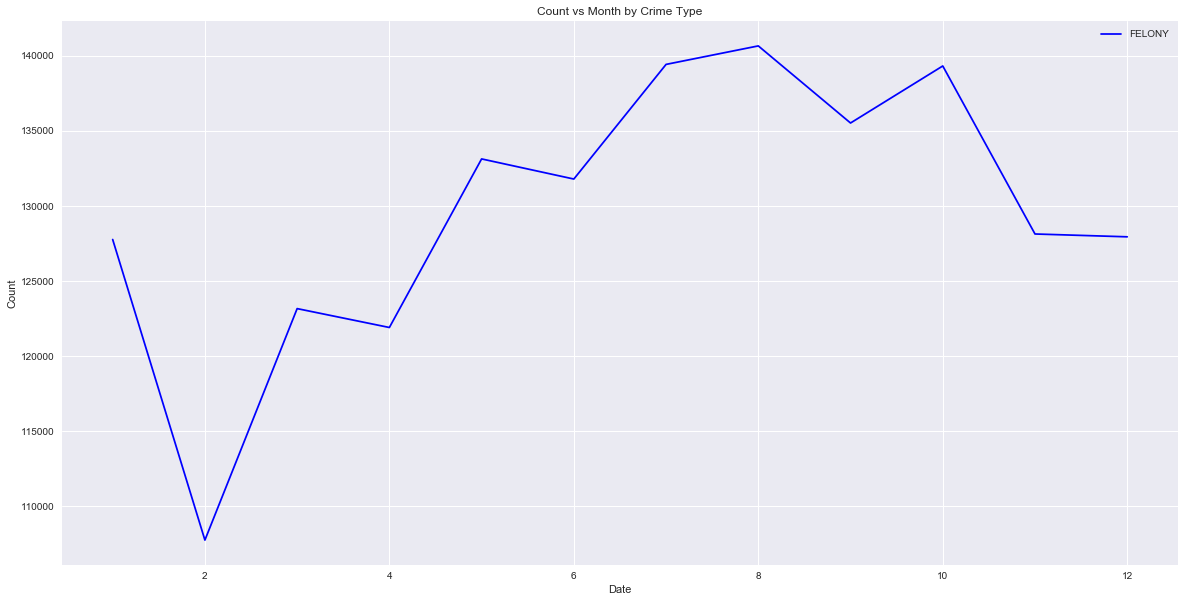

In [97]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

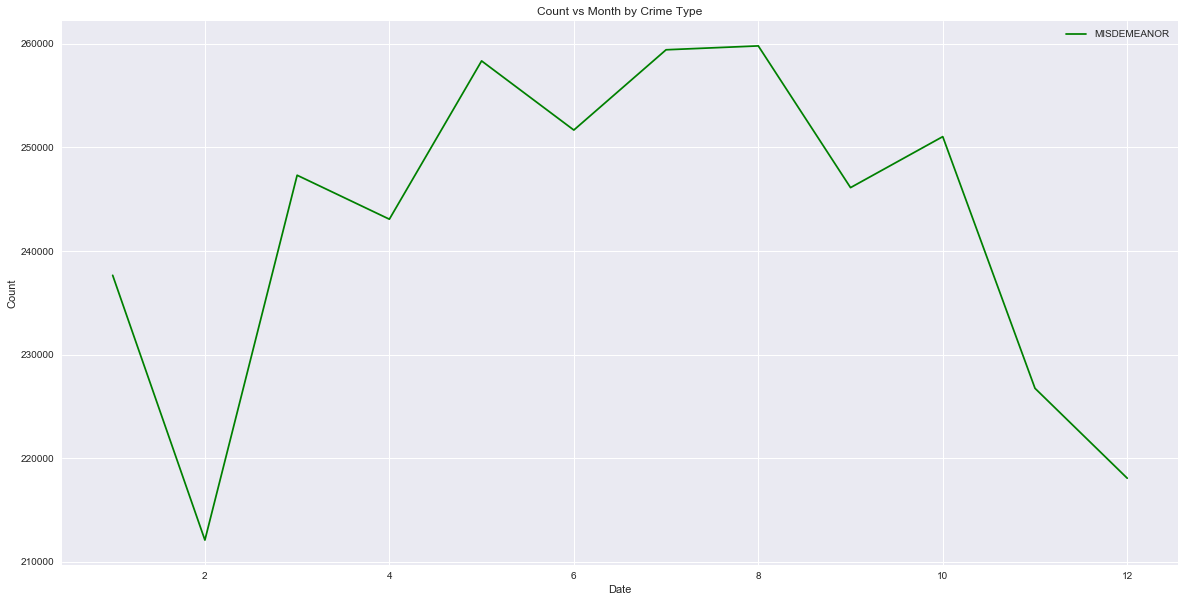

In [89]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

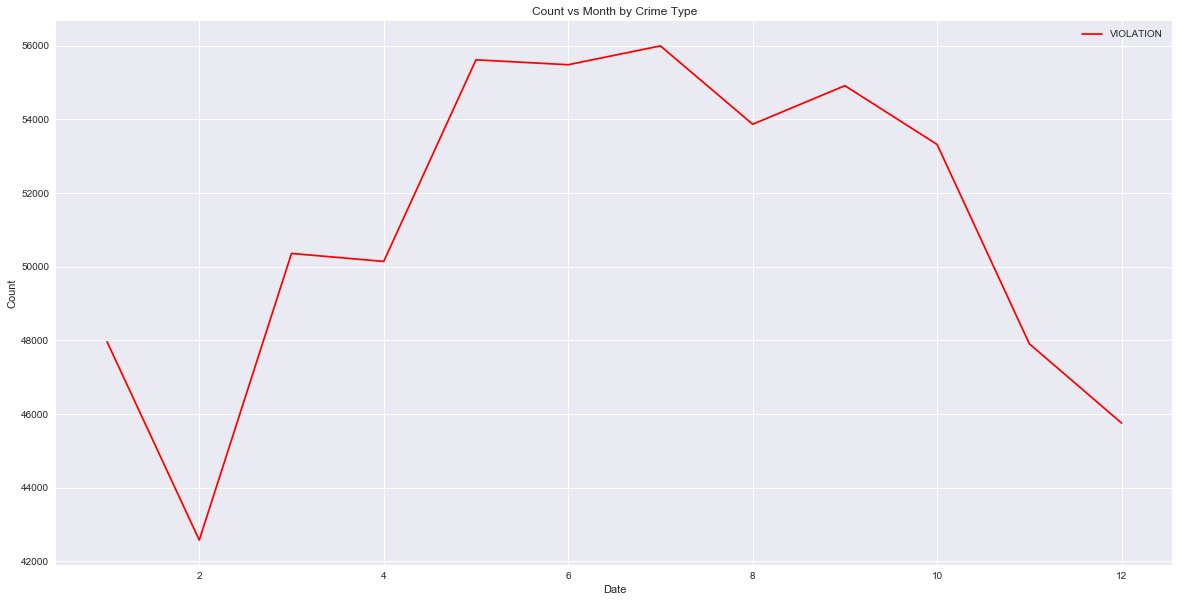

In [90]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

#### Normalize for the number of dates in a month

In [253]:
df.iloc[2]

DATE                03
FELONY          119190
MISDEMEANOR     239335
VIOLATION      48736.5
OTHER                0
Name: 8, dtype: object

In [255]:
dates=[31,28,31,30,31,30,31,31,30,31,30,31]
for i in range (12):
    df.iloc[i][1:]=pd.to_numeric(df.iloc[i][1:])/dates[i]*30
df

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER
1,01,123645,229986,46415.8,0
11,02,115436,227236,45615,0
8,03,119190,239335,48736.5,0
9,04,121905,243069,50144,0
0,05,128841,250016,53826.8,0
6,06,131796,251675,55488,0
7,07,134936,251056,54192.6,0
5,08,136128,251418,52133.2,0
3,09,135529,246116,54918,0
10,10,134835,242942,51601,0


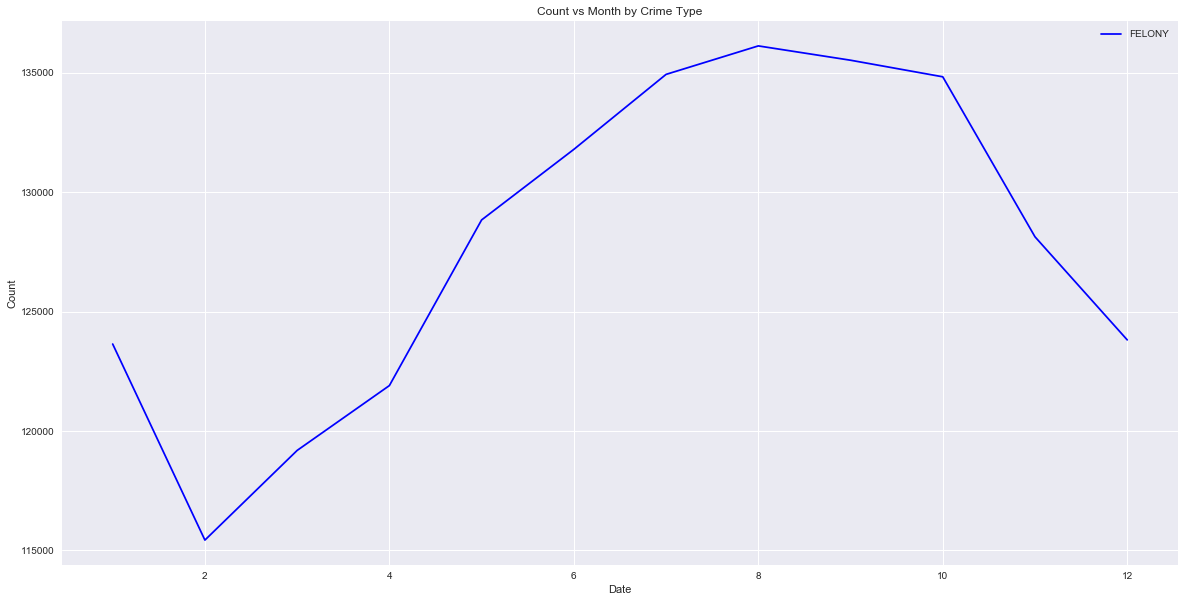

In [256]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

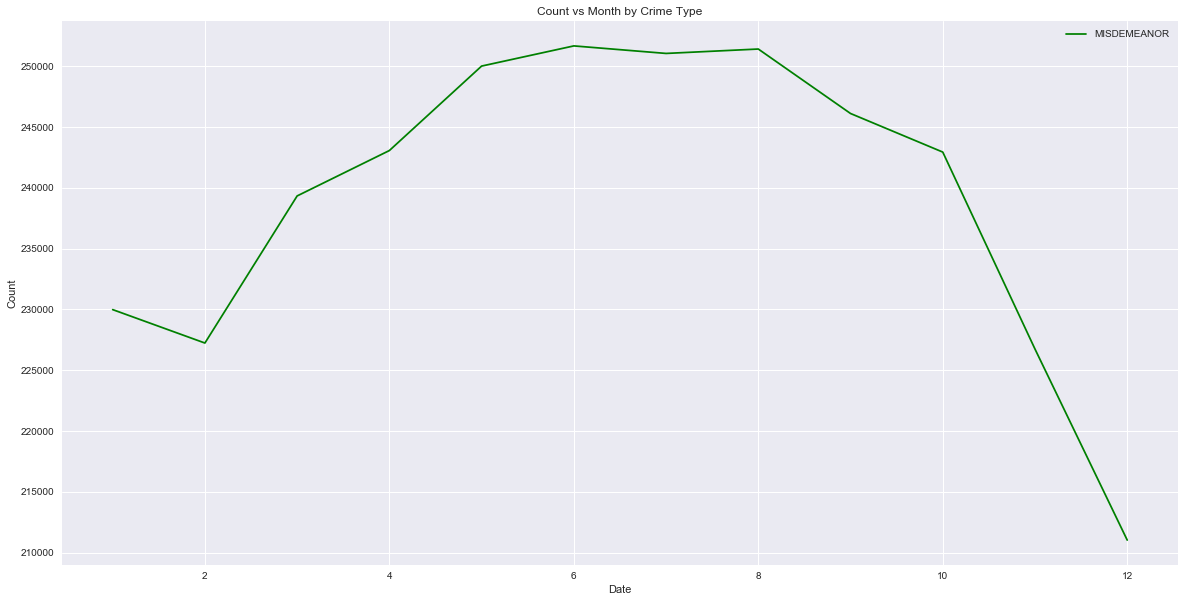

In [257]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

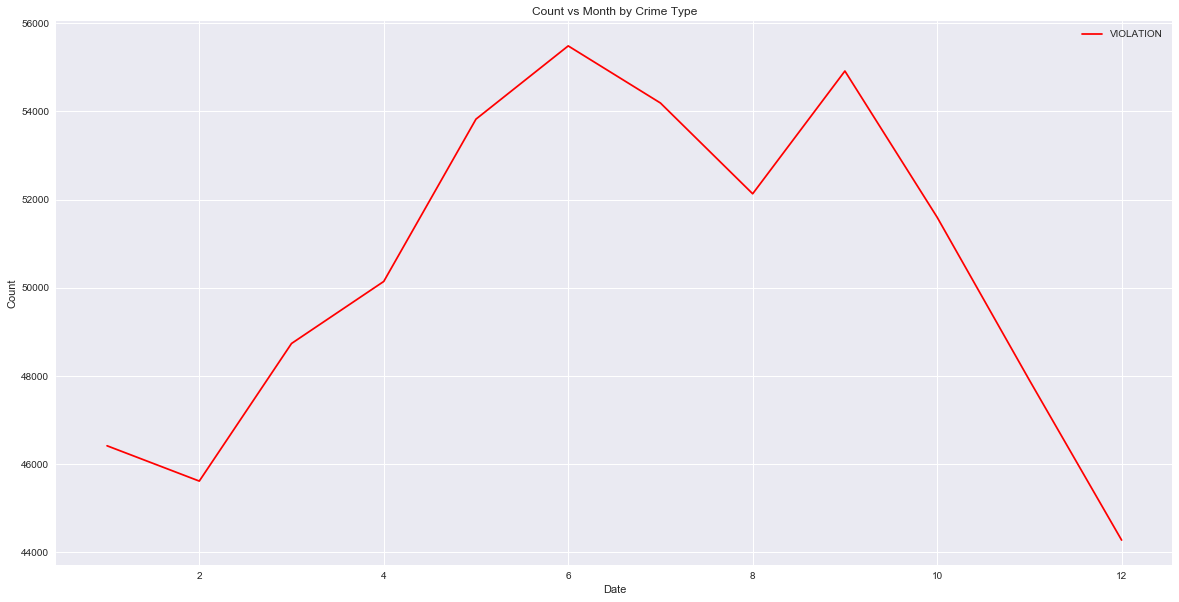

In [258]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

### Valid, Null vs Invalid

In [108]:
valid=pd.read_csv("result.csv",index_col=0)
valid

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
null,0,65,0,205959,205573,0,0,2880,733,733,...,1,217752,4689,1040976,996803,32417,32417,32417,32417,32417
invalid,0,511,0,115,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
valid,1048575,1047999,1048575,842501,843002,1048575,1048575,1045695,1047842,1047842,...,1048574,830823,1043886,7599,51772,1016158,1016158,1016158,1016158,1016158


In [122]:
valid.ix['null']

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
Name: null, dtype: int64

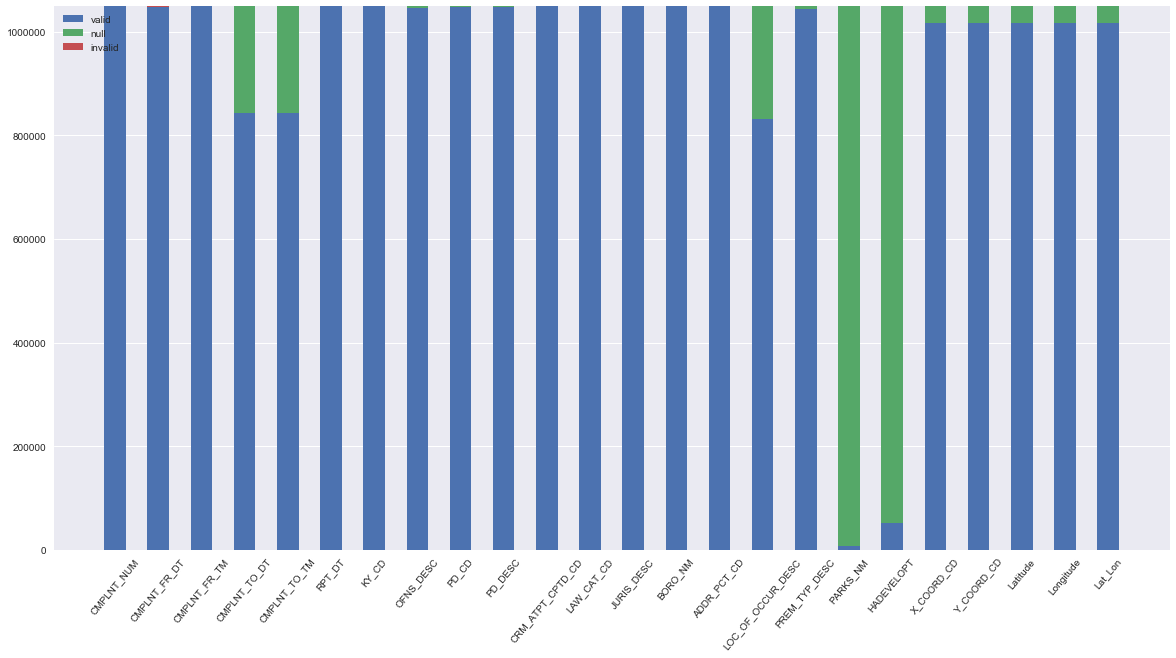

In [155]:
y_pos = np.arange(len(valid.columns))
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, valid.ix['valid'], bar_width, align='center', label='valid')
plt.bar(y_pos, valid.ix['null'], bar_width, align='center', label='null', bottom=valid.ix['valid'])
plt.bar(y_pos, valid.ix['invalid'],bar_width, align='center', label='invalid', bottom=valid.ix['valid']+valid.ix['null'])
plt.xticks(y_pos, valid.columns, rotation=50)
plt.legend()
plt.show()

### Location

In [150]:
lines = crime.filter(lambda line: line != header) \
            .filter(lambda x:'2006'<=x[1][6:]<='2016')\
            .map(lambda x: (x[13],1)) \
            .reduceByKey(lambda x,y: (x+y))

lines = lines.map(lambda x: "%s\t%d" %(x[0],x[1])).collect()
lines = [line.split('\t') for line in lines]

In [172]:

df=pd.DataFrame(lines)
df.columns=['Borough','Count']
df=df[-5:]
df['Count'].astype(np.int)

1     242806
2    1519980
3    1006880
4    1211938
5    1099765
Name: Count, dtype: int64

/Users/jingyi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


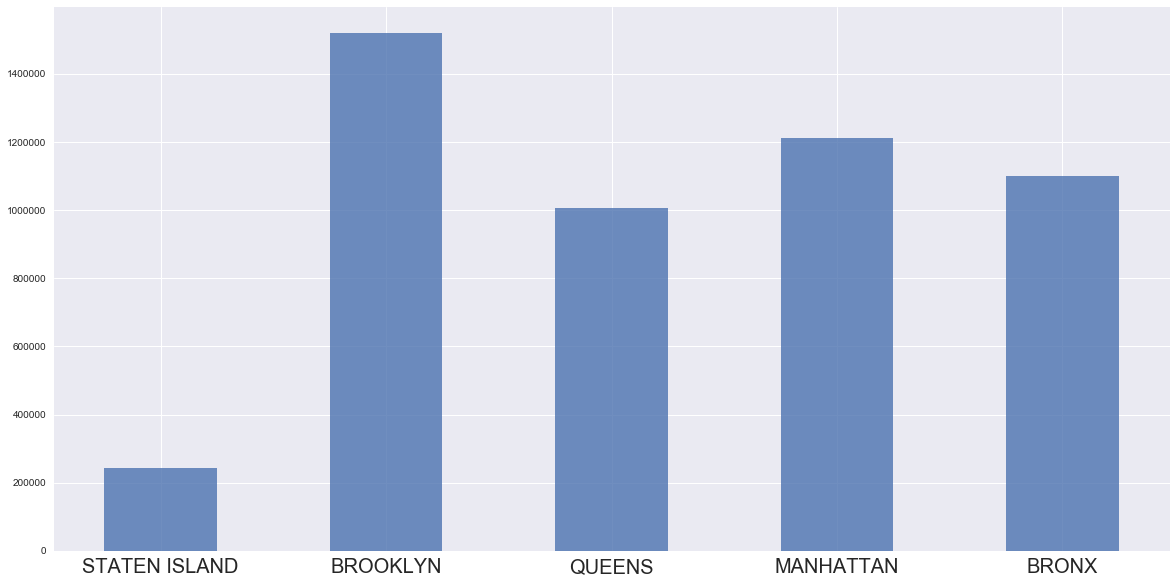

In [180]:
y_pos = np.arange(df.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df['Count'].astype(np.int), bar_width,align='center', alpha=0.8)
plt.xticks(y_pos, df['Borough'],fontsize = 20)
plt.legend()
plt.show()

In [ ]:
lines = crime.filter(lambda line: line != header) \
            .filter(lambda x:'2006'<=x[1][6:]<='2016')\
            .map(lambda x: ((x[11],x[13]),1)) \
            .reduceByKey(lambda x,y: (x+y))

lines = lines.map(lambda x: "%s\t%s\t%d" %(x[0][0],x[0][1],x[1])).collect()
lines = [line.split('\t') for line in lines]

### Crime Map 

In [183]:
data=pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/Users/jingyi/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [184]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


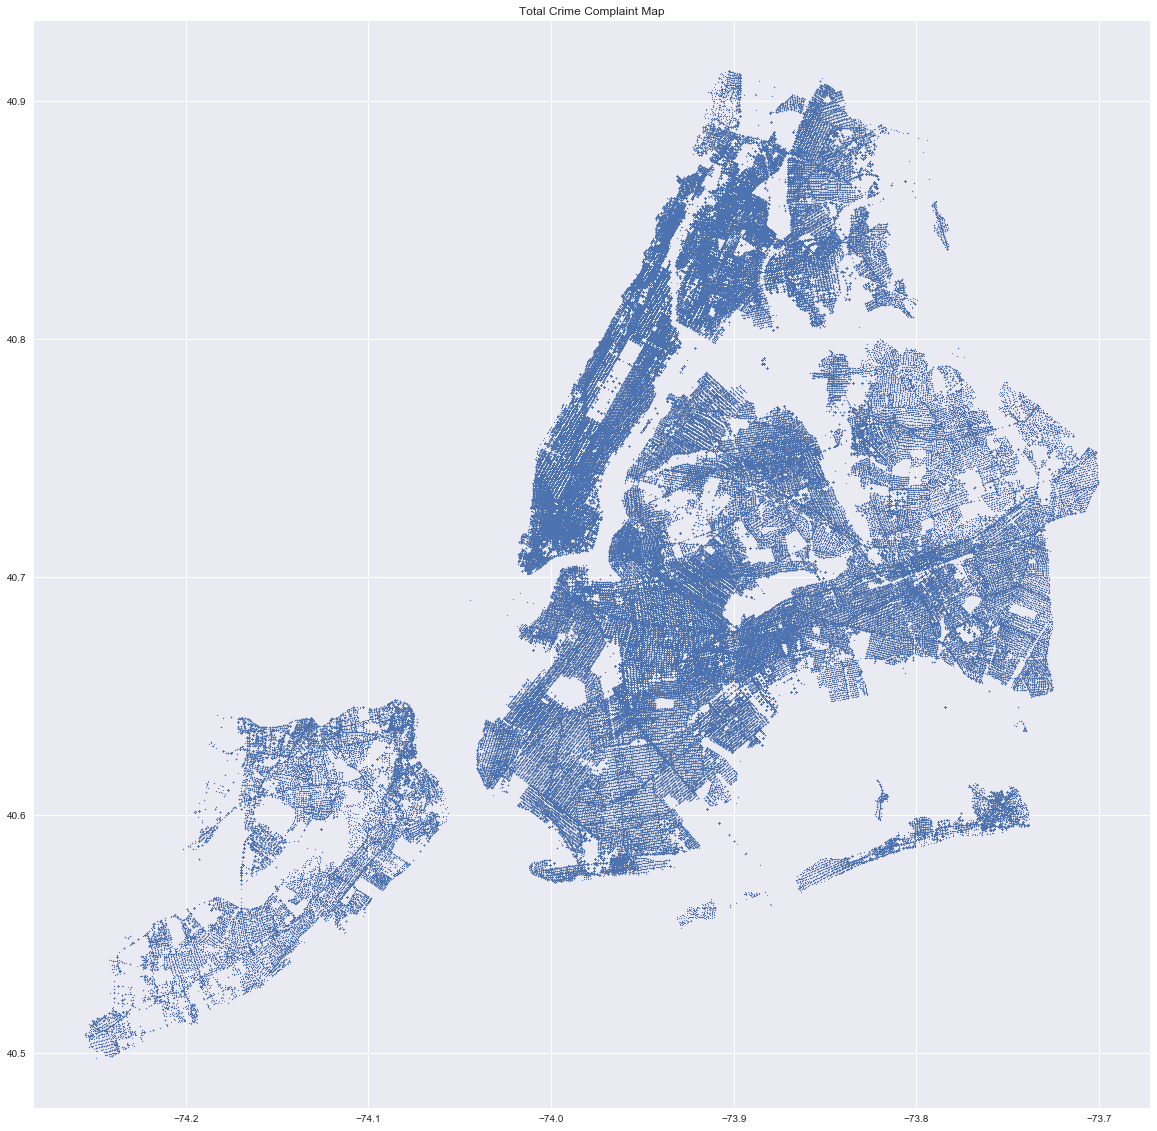

In [240]:
plt.figure(figsize=(20,20))
plt.scatter(data['Longitude'],data['Latitude'],s=0.6)
plt.title('Total Crime Complaint Map')
plt.show()

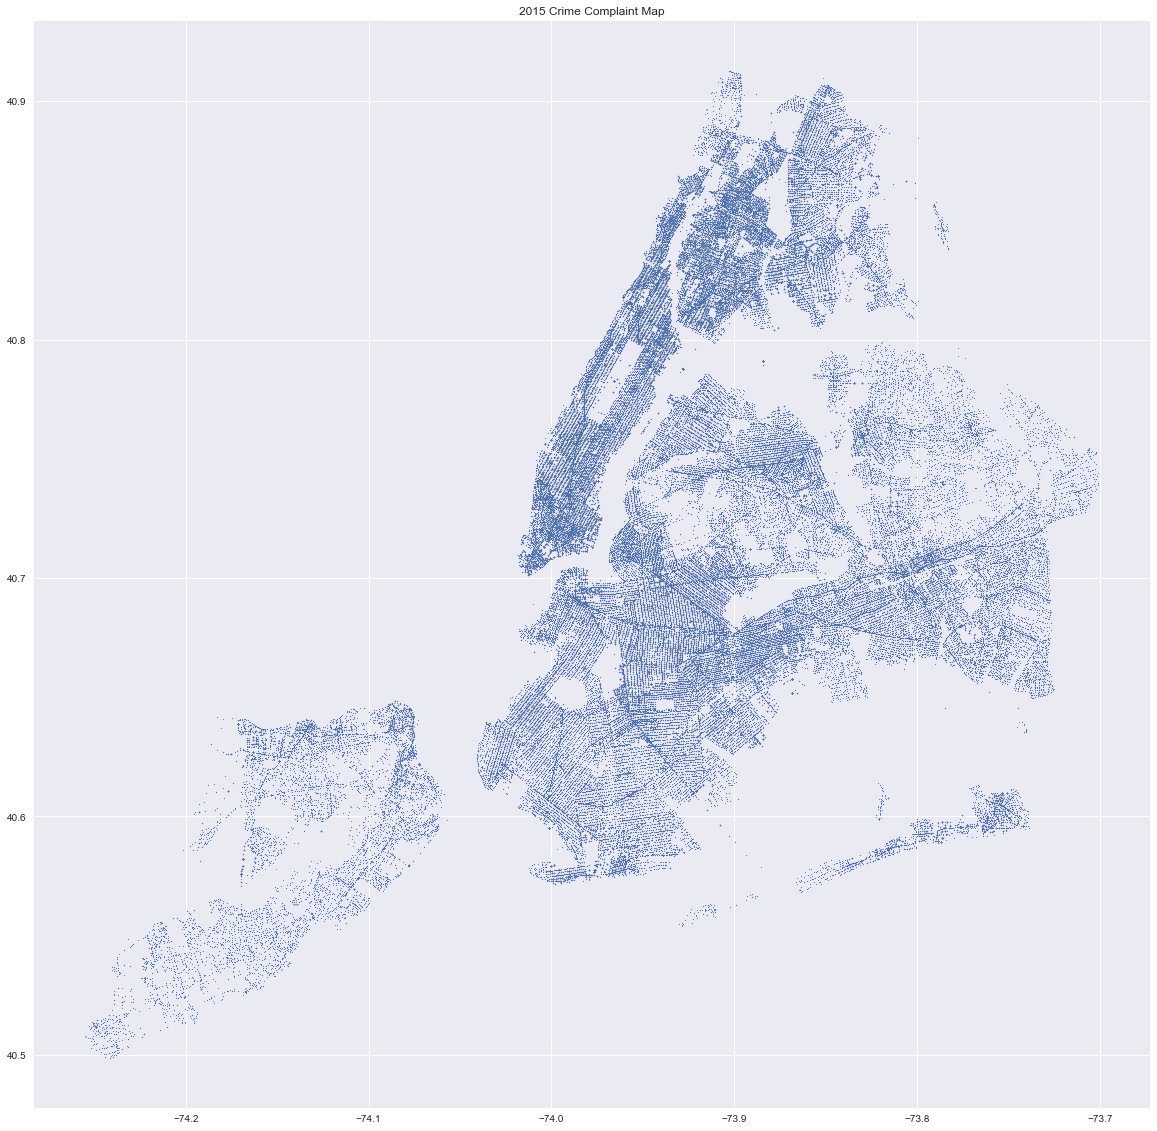

In [238]:
data2015=data[data['CMPLNT_FR_DT'].str[-4:]=='2015']
plt.figure(figsize=(20,20))
plt.scatter(data2015['Longitude'],data2015['Latitude'],s=0.6)
plt.title('2015 Crime Complaint Map')
plt.show()

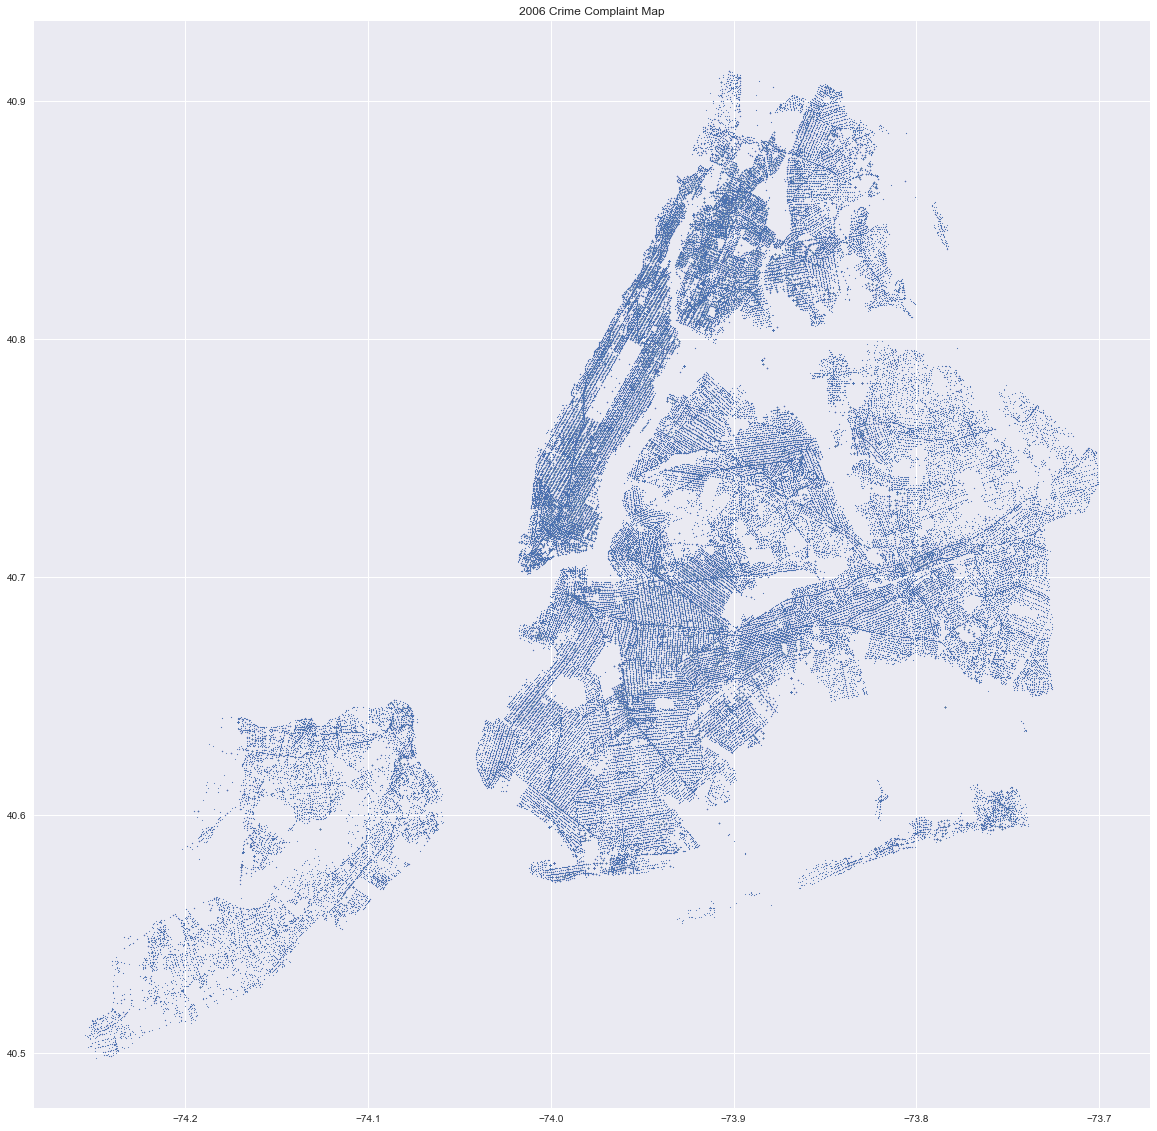

In [237]:
data2006=data[data['CMPLNT_FR_DT'].str[-4:]=='2006']
plt.figure(figsize=(20,20))
plt.scatter(data2006['Longitude'],data2006['Latitude'],s=0.6)
plt.title('2006 Crime Complaint Map')
plt.show()